## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

2024-08-02 10:45:44.674999: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


((60000, 784), (10000, 784))

In [2]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.3282 - val_loss: 0.2042
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2008 - val_loss: 0.1910
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1875 - val_loss: 0.1810
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1792 - val_loss: 0.1755
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1748 - val_loss: 0.1728
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1722 - val_loss: 0.1711
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1699 - val_loss: 0.1692
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1683 - val_loss: 0.1676
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1665 - val_loss: 0.1665
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1652 - val_loss: 0.1653
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1636 - val_loss: 0.1645
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━

In [26]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

ValueError: Input 0 of layer "functional_27" is incompatible with the layer: expected shape=(None, 16), found shape=(4, 4)

In [12]:
plt.imshow(noise_preds[1].reshape(28,28))

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [13]:
np.max(encoded_imgs)

81.255196

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


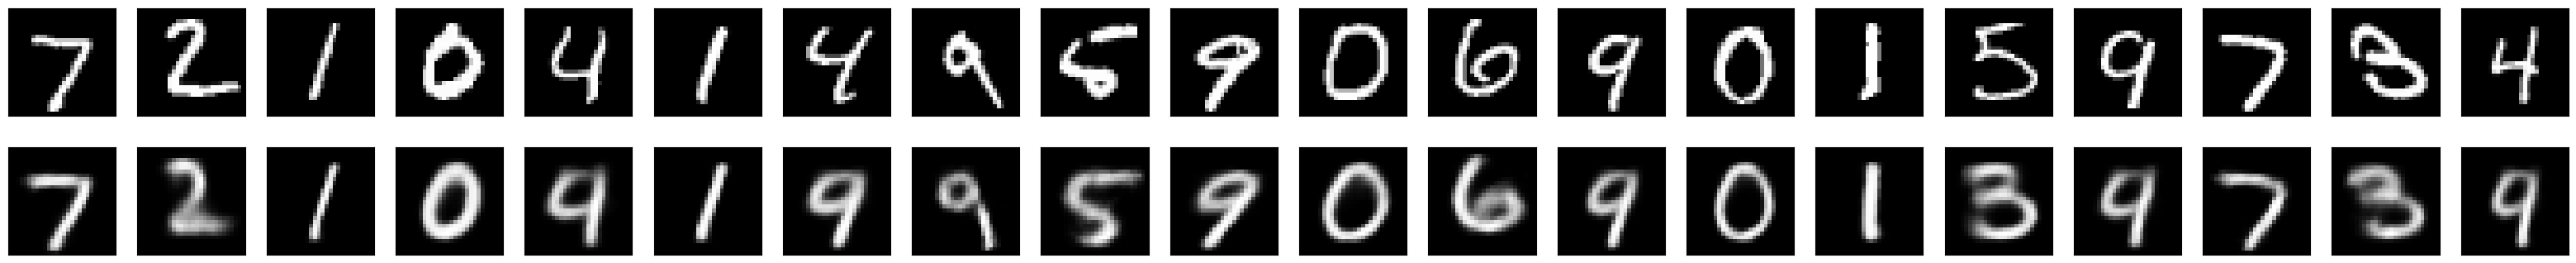

In [14]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
encoded_imgs

array([[ 3.1579177 , 15.398323  ,  0.        , 32.215767  ],
       [16.642792  , 15.625145  ,  0.        , 12.687285  ],
       [43.929268  , 33.305115  ,  0.        , 58.760162  ],
       ...,
       [ 6.4537096 ,  8.021972  ,  0.        , 19.50114   ],
       [11.718173  ,  0.11633474,  0.        , 10.53661   ],
       [31.553734  , 22.603128  ,  0.        , 13.677313  ]],
      dtype=float32)

In [27]:
%matplotlib inline

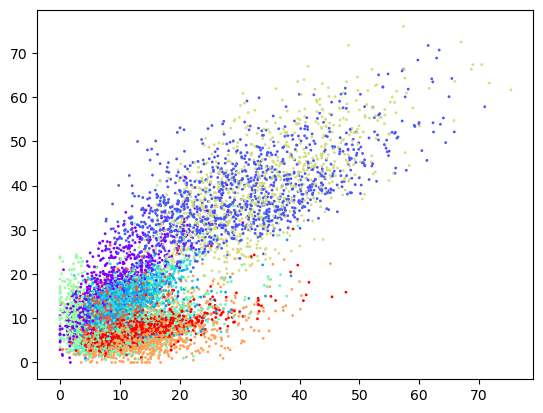

In [28]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

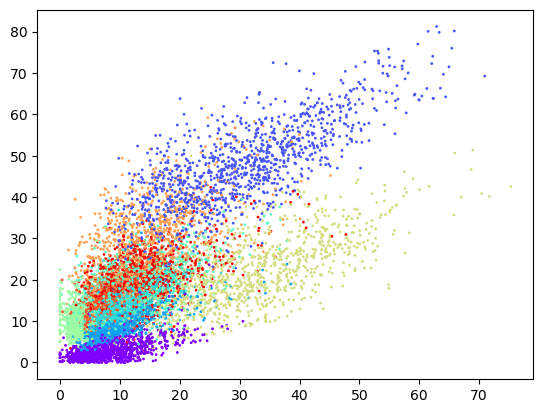

In [29]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

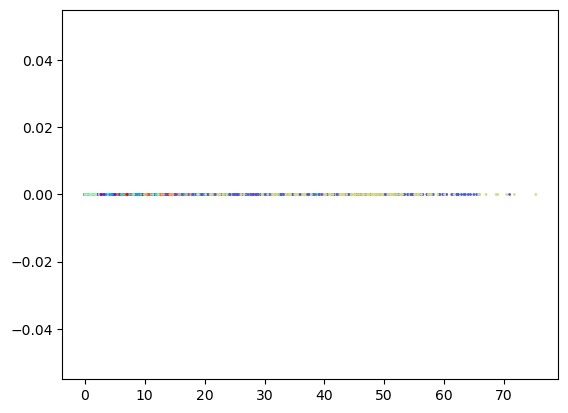

In [30]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

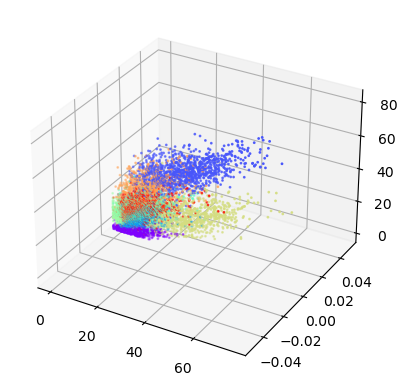

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and save the loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [21]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [32]:
encoding_dims = range(2, 18, 2)
losses = []

In [33]:
n = 10

In [35]:
for encoding_dim in encoding_dims:
    # this is our input placeholder
    input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(input_img)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)

    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    # Train the model
    history = autoencoder.fit(xtrain, xtrain,
                              epochs=50,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(xtest, xtest),
                              verbose=1)  

    # Store the final validation loss
    val_loss = history.history['val_loss'][-1]
    losses.append(val_loss)

    # Creating encoder and decoder models for each dimension
    encoder = Model(input_img, encoded)
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layers = autoencoder.layers[-3:]
    x = decoder_layers[0](encoded_input)
    for layer in decoder_layers[1:]:
        x = layer(x)
    decoder = Model(encoded_input, x)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3394 - val_loss: 0.2496
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2358 - val_loss: 0.2161
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2140 - val_loss: 0.2063
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2051 - val_loss: 0.1982
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1971 - val_loss: 0.1928
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1921 - val_loss: 0.1891
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1890 - val_loss: 0.1873
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1867 - val_loss: 0.1847
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1844 - val_loss: 0.1842
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1831 - val_loss: 0.1828
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1820 - val_loss: 0.1818
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


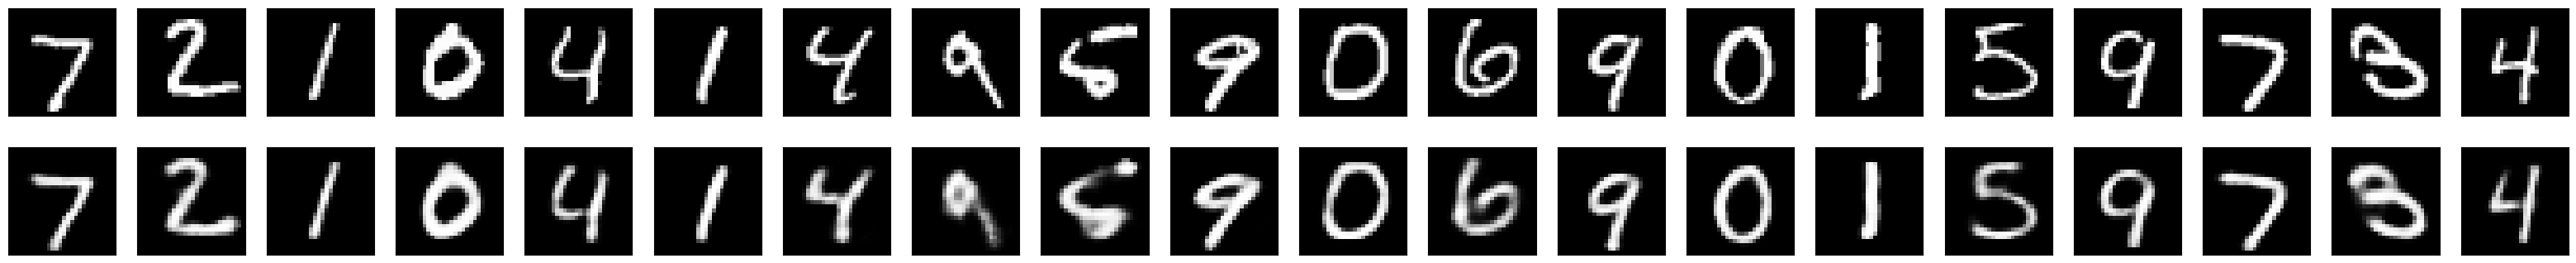

In [40]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


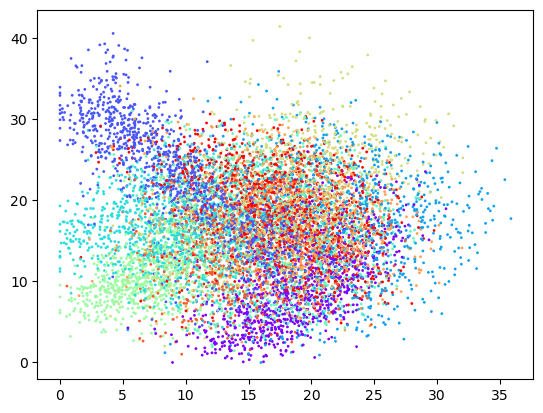

In [45]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

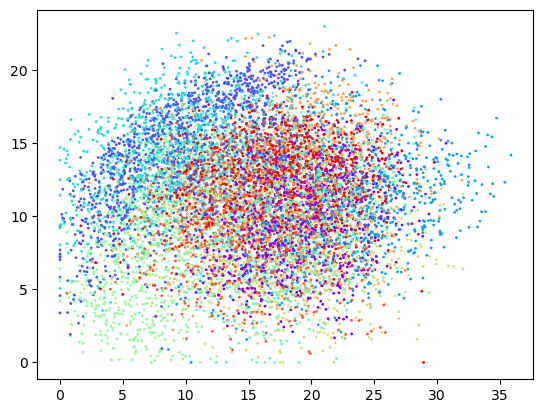

In [44]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

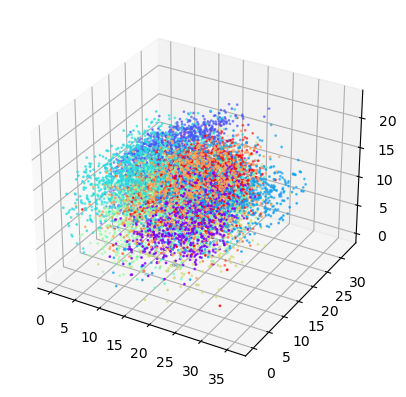

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [49]:
noise_factor = 0.5
xtrain_noisy = xtrain + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtrain.shape)
xtest_noisy = xtest + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtest.shape)
xtrain_noisy = np.clip(xtrain_noisy, 0., 1.)
xtest_noisy = np.clip(xtest_noisy, 0., 1.)

In [50]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)  
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

In [54]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(xtrain_noisy, xtrain, epochs=50, batch_size=256, shuffle=True, validation_data=(xtest_noisy, xtest))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3390 - val_loss: 0.2224
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2128 - val_loss: 0.1857
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1840 - val_loss: 0.1776
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1771 - val_loss: 0.1731
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1724 - val_loss: 0.1697
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1689 - val_loss: 0.1674
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1666 - val_loss: 0.1661
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1646 - val_loss: 0.1641
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1628 - val_loss: 0.1630
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1613 - val_loss: 0.1620
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1597 - val_loss: 0.1607
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10

In [55]:
decoded_imgs = autoencoder.predict(xtest_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


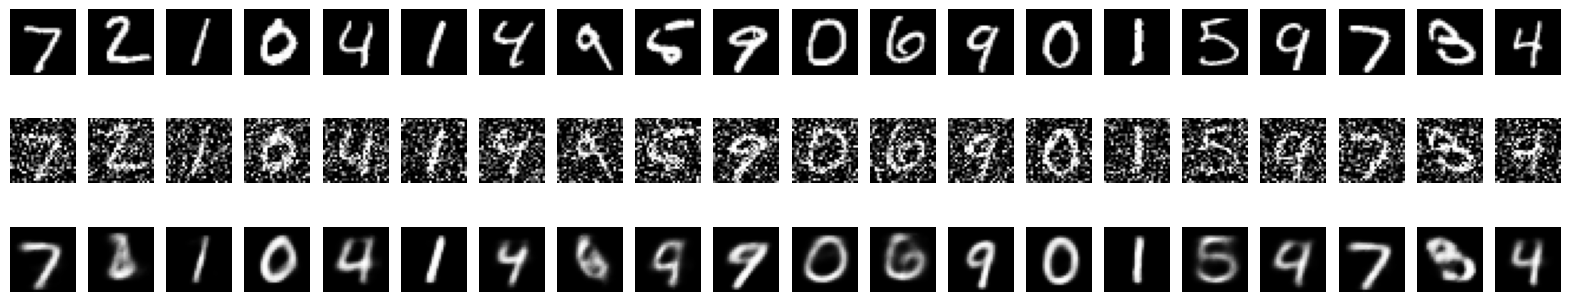

In [61]:
n = 20  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(xtest_noisy[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')
plt.show()

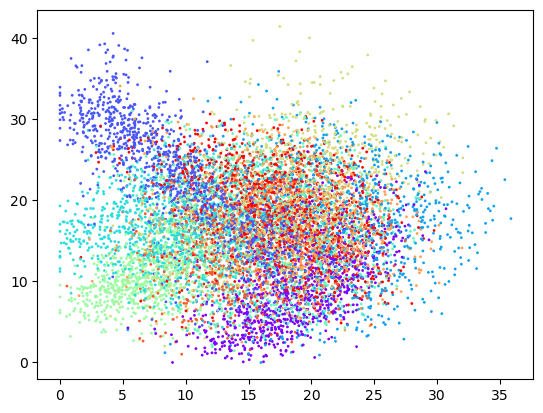

In [62]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

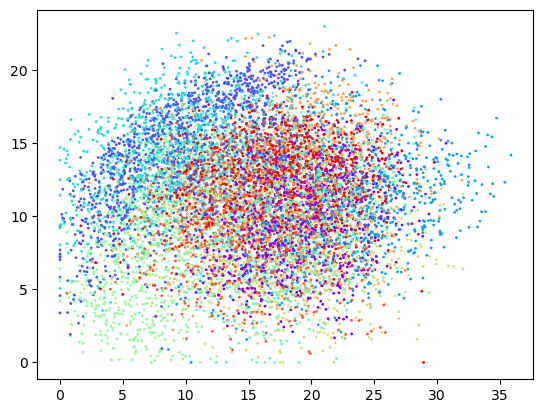

In [63]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

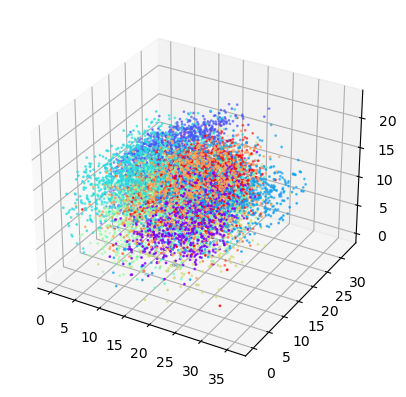

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


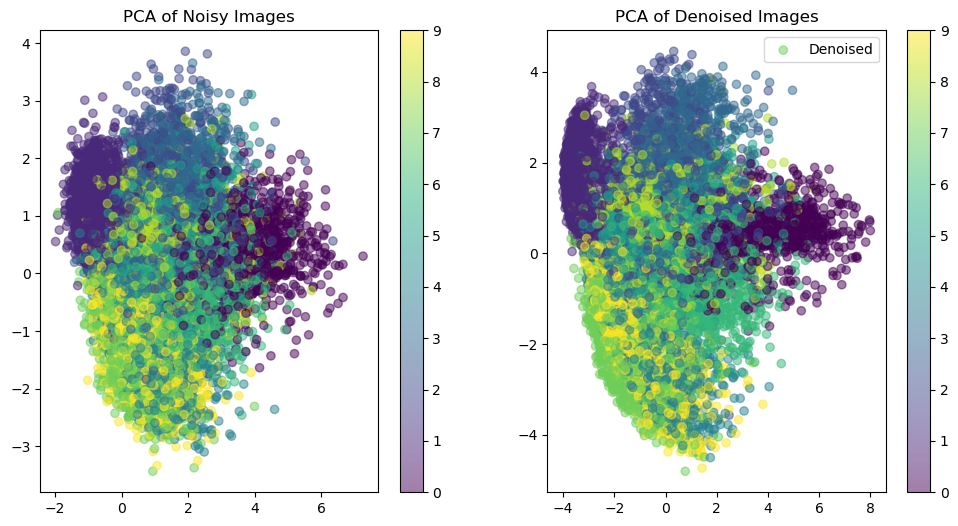

In [72]:
from sklearn.decomposition import PCA

decoded_imgs = autoencoder.predict(xtest_noisy)

pca = PCA(n_components=2)
xtest_pca = pca.fit_transform(xtest)
xtest_noisy_pca = pca.transform(xtest_noisy)
decoded_imgs_pca = pca.transform(decoded_imgs)


plt.figure(figsize=(12, 6))

# Plot noisy data with labels as colors
plt.subplot(1, 2, 1)
scatter = plt.scatter(xtest_noisy_pca[:, 0], xtest_noisy_pca[:, 1], alpha=0.5, c=ytest, cmap='viridis', label='Noisy')
plt.title('PCA of Noisy Images')
plt.colorbar(scatter)  

# Plot denoised data with labels as colors
plt.subplot(1, 2, 2)
scatter = plt.scatter(decoded_imgs_pca[:, 0], decoded_imgs_pca[:, 1], alpha=0.5, c=ytest, cmap='viridis', label='Denoised')
plt.title('PCA of Denoised Images')
plt.colorbar(scatter) 

plt.legend()
plt.show()
